# Project Setup
### Git Hub Link: https://github.com/brwi2400/logistic_pca/tree/main

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
path = '/content/drive/MyDrive/MSDS/Unsupervised_Learning/FINAL/framingham.csv'
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Exploratory Data Analysis
For this section, I am viewing the structure of the data and summary statistics, along with the correlation of each variable. I included distribution plots/histograms of each variable, along with a correlation matrix and box plots to show outliers. I also printed the number of NANs. Ultimately since less than 10% of the data was NANs, I decided to drop them. I still had over 3600 records.


Number of NANs: 

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null  

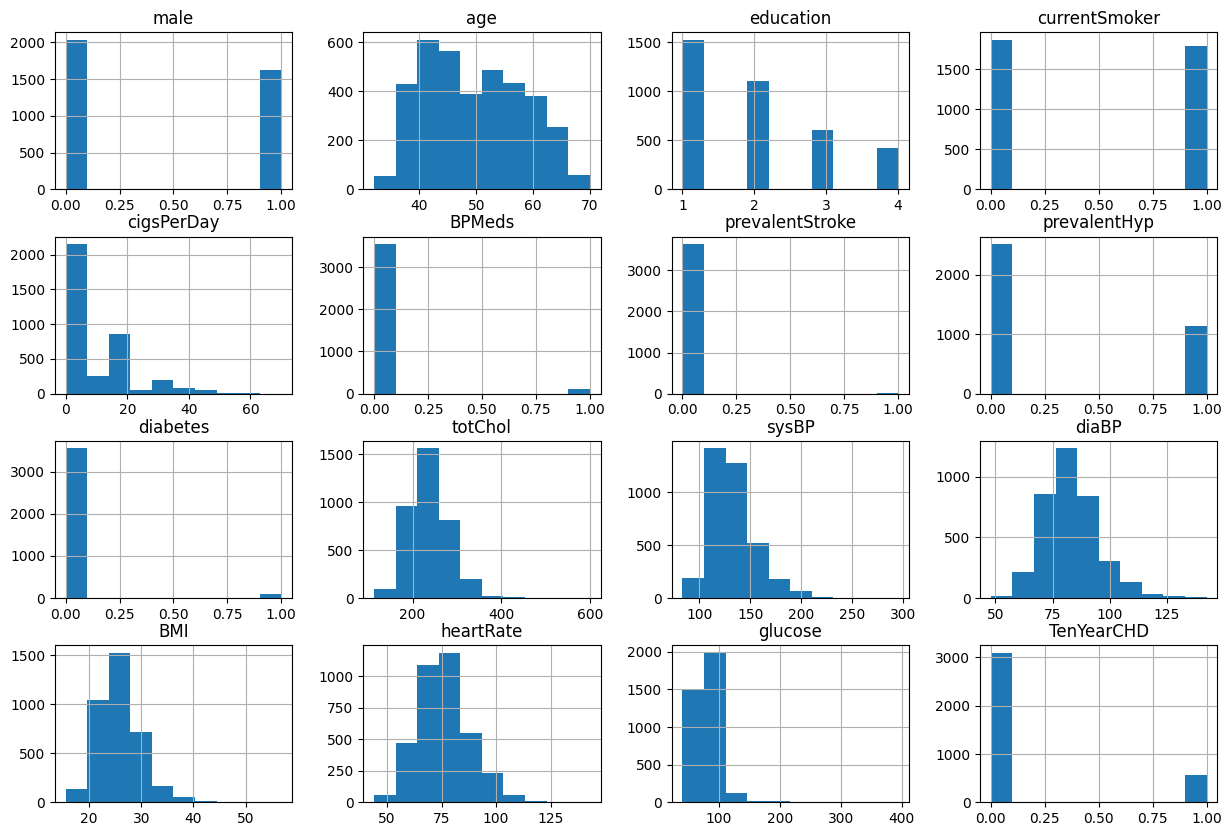

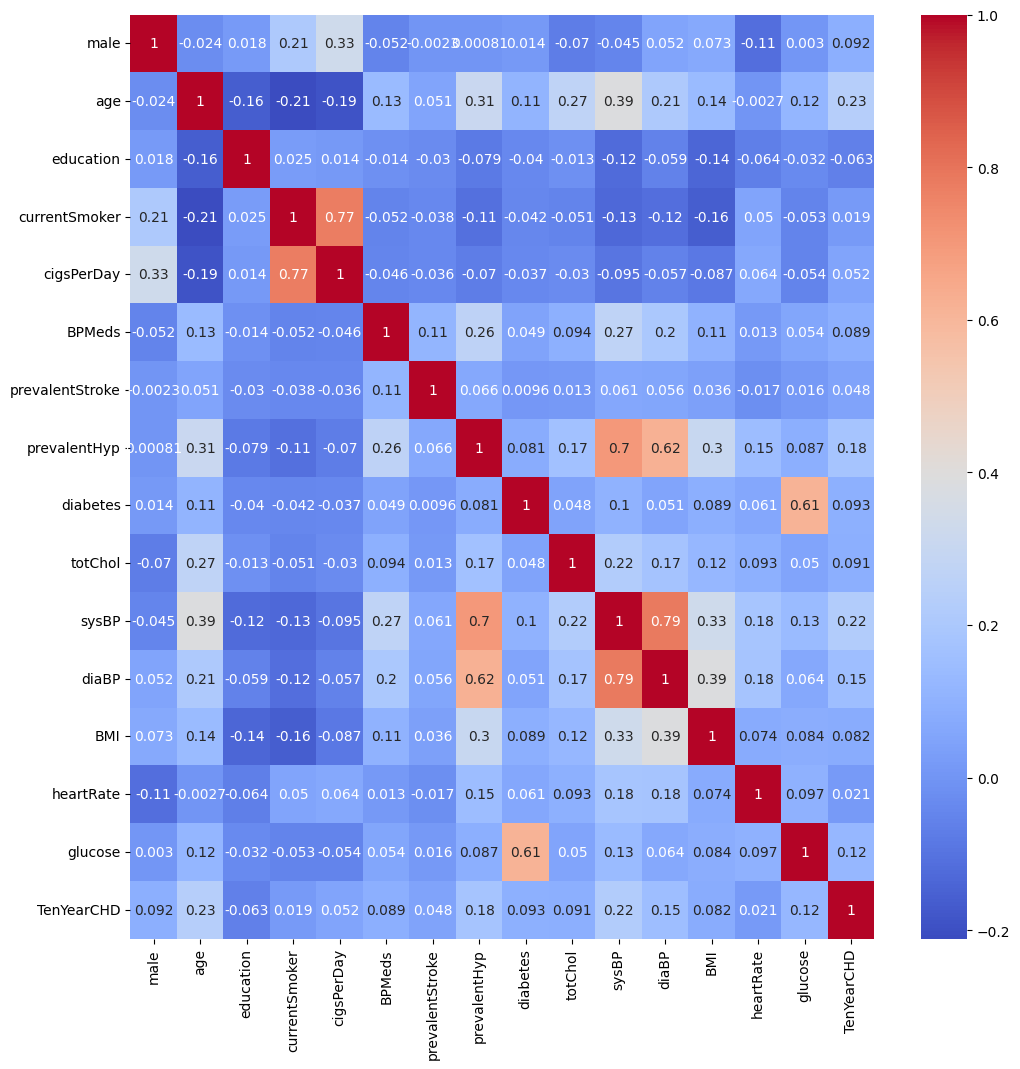

In [ ]:
print("Number of NANs: \n")
print(df.isnull().sum(), '\n')
df = df.dropna()

print(df.info())
print('\n', df.describe() )

import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(15, 10))
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Analysis
I will be performing a logistic regression on all variables to predict the TenYearCHD variable before and after a principle components analysis.

## Test Train Split

In [ ]:
# Generate test and train datasets
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

## Initial Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Logistic regression model
logreg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # Calculate ROC AUC score
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8360655737704918
Precision: 0.5625
Recall: 0.07377049180327869
F1-score: 0.13043478260869565
ROC AUC: 0.5311475409836065
Confusion Matrix:
[[603   7]
 [113   9]]


## PCA Analysis
I am conducting a PCA analysis prior to the logistic regression model now.  I will use cross validation to find the best explained variance parameter.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

PCA Accuracy: 0.842896174863388
PCA Precision: 0.7333333333333333
PCA Recall: 0.09016393442622951
PCA F1-score: 0.16058394160583941
PCA ROC AUC: 0.5418032786885246
PCA Confusion Matrix:
[[606   4]
 [111  11]]


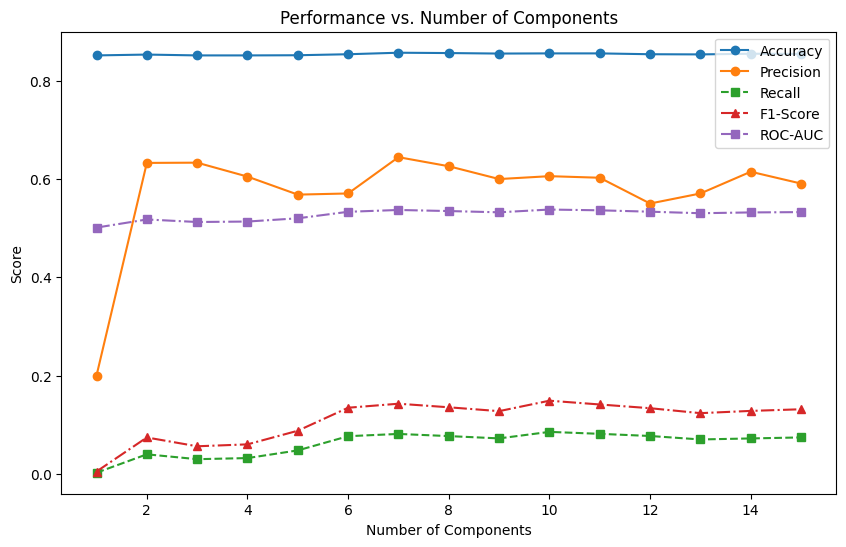

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

# Get range of components to try for CV
n_components_list = list(range(1, X_train.shape[1] + 1))

# Initialize lists to store results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
confusion_matrices = []

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n_components in n_components_list:
    pca = PCA(n_components=n_components)

    temp_accuracy_scores = []
    temp_precision_scores = []
    temp_recall_scores = []
    temp_f1_scores = []
    temp_roc_auc_scores = []
    temp_confusion_matrices = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        X_train_pca = pca.fit_transform(X_train_fold)
        X_val_pca = pca.transform(X_val_fold)

        logreg_pca = LogisticRegression(max_iter=10000)
        logreg_pca.fit(X_train_pca, y_train_fold)
        y_pred_pca = logreg_pca.predict(X_val_pca)

        temp_accuracy_scores.append(accuracy_score(y_val_fold, y_pred_pca))
        temp_precision_scores.append(precision_score(y_val_fold, y_pred_pca))
        temp_recall_scores.append(recall_score(y_val_fold, y_pred_pca))
        temp_f1_scores.append(f1_score(y_val_fold, y_pred_pca))
        temp_roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_pca))
        temp_confusion_matrices.append(confusion_matrix(y_val_fold, y_pred_pca))

    accuracy_scores.append(np.mean(temp_accuracy_scores))
    precision_scores.append(np.mean(temp_precision_scores))
    recall_scores.append(np.mean(temp_recall_scores))
    f1_scores.append(np.mean(temp_f1_scores))
    roc_auc_scores.append(np.mean(temp_roc_auc_scores))
    confusion_matrices.append(np.mean(temp_confusion_matrices, axis=0))

results_df = pd.DataFrame({
    'n_components': n_components_list,
    'accuracy': accuracy_scores,
    'precision': precision_scores,
    'recall': recall_scores,
    'f1_score': f1_scores,
    'roc_auc': roc_auc_scores,
    'confusion_matrix': confusion_matrices
})

plt.figure(figsize=(10, 6))
plt.plot(results_df['n_components'], results_df['accuracy'], marker='o', linestyle='-', label='Accuracy')
plt.plot(results_df['n_components'], results_df['precision'], marker='o', linestyle='-', label='Precision')
plt.plot(results_df['n_components'], results_df['recall'], marker='s', linestyle='--', label='Recall')
plt.plot(results_df['n_components'], results_df['f1_score'], marker='^', linestyle='-.', label='F1-Score')
plt.plot(results_df['n_components'], results_df['roc_auc'], marker='s', linestyle='-.', label='ROC-AUC')
plt.title('Performance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Score')
_ = plt.legend()

# PCA with 7 components
pca = PCA(n_components=7) # Apply PCA with 7 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_train_pca, y_train)
y_pred_pca = logreg_pca.predict(X_test_pca)

# Evaluate the PCA-transformed model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print(f"PCA Accuracy: {accuracy_pca}")
print(f"PCA Precision: {precision_pca}")
print(f"PCA Recall: {recall_pca}")
print(f"PCA F1-score: {f1_pca}")
print(f"PCA ROC AUC: {roc_auc_pca}")
print(f"PCA Confusion Matrix:\n{conf_matrix_pca}")

# Evaluation
As you can see, by conducting a principle components analysis, we were able to improve the model.

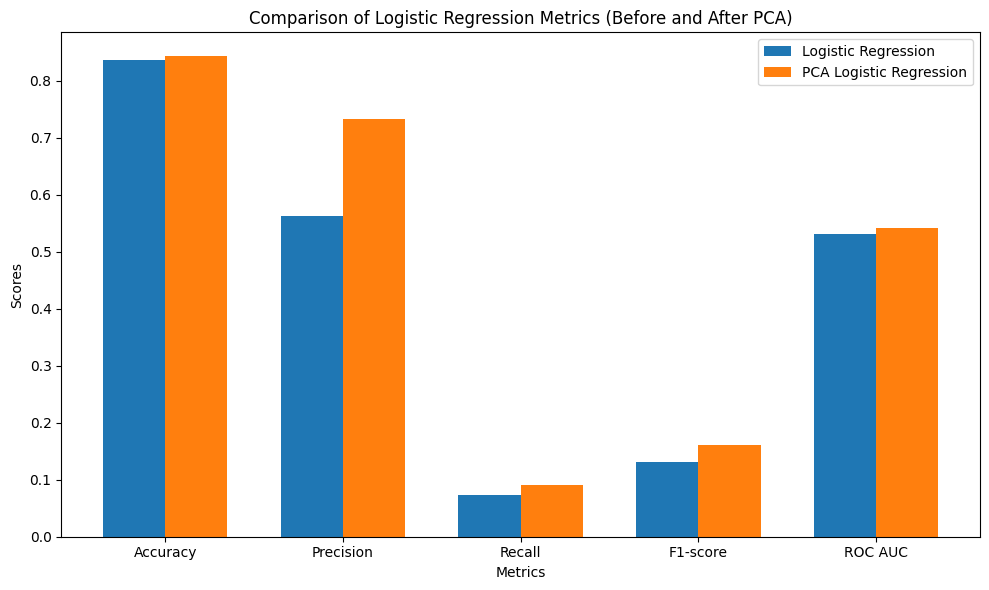

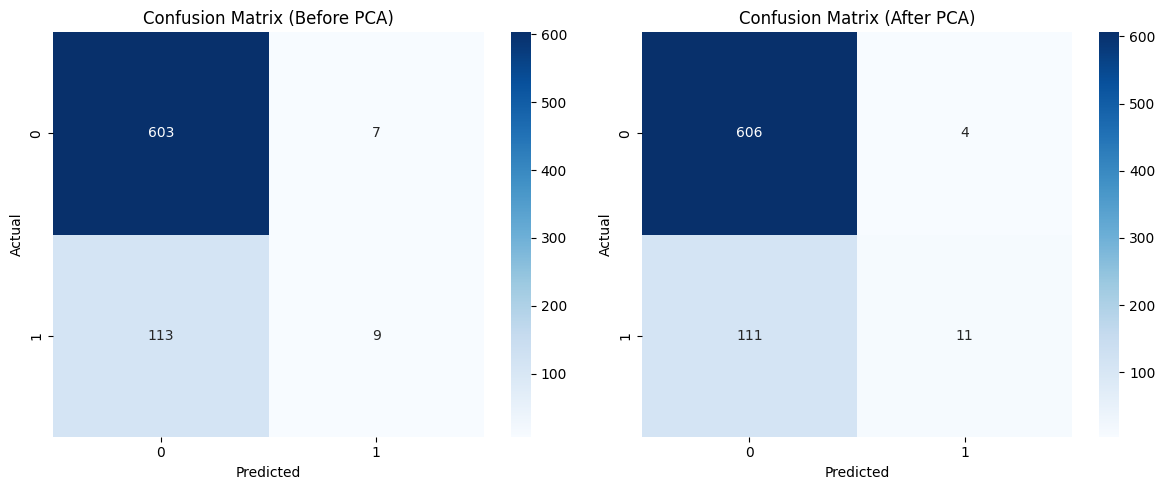

In [ ]:
# Metrics before and after PCA
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
values_before = [accuracy, precision, recall, f1, roc_auc]
values_after = [accuracy_pca, precision_pca, recall_pca, f1_pca, roc_auc_pca]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, values_before, bar_width, label='Logistic Regression')
plt.bar(index + bar_width, values_after, bar_width, label='PCA Logistic Regression')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Logistic Regression Metrics (Before and After PCA)')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix - Before PCA
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Before PCA)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion Matrix - After PCA
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (After PCA)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()